In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/airfoil-selfnoise-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'airfoil-selfnoise-dataset' dataset.
Path to dataset files: /kaggle/input/airfoil-selfnoise-dataset


In [21]:
import os
import pandas as pd

print(os.listdir(path))
file_path = os.path.join(path, "AirfoilSelfNoise.csv")
df =pd.read_csv(os.path.join(path, "AirfoilSelfNoise.csv"))
df.head()

['AirfoilSelfNoise.csv']


,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [22]:

print(df.isnull().sum())


f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64


In [23]:
X = df.drop(columns=df.columns[-1])
y= df[df.columns[-1]]

print(y)

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: SSPL, Length: 1503, dtype: float64


In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (1202, 5)
X_test: (301, 5)
y_train: (1202,)
y_test: (301,)


In [25]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled =y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

print(y_train_scaled)




[[ 0.74005987]
 [ 1.41485368]
 [ 1.68436241]
 ...
 [ 1.20491134]
 [-0.02335354]
 [ 0.59873568]]


In [26]:
from sklearn.svm import SVR

svr_model = SVR(kernel="rbf")
svr_model.fit(X_train_scaled,y_train_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [38]:



y_pred_scaled = svr_model.predict(X_test_scaled)



y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1))

print("Predicted y value:", y_pred_original[0,0])

y_test_original = y_test.values.reshape(-1,1)

Predicted y value: 126.6461712946002


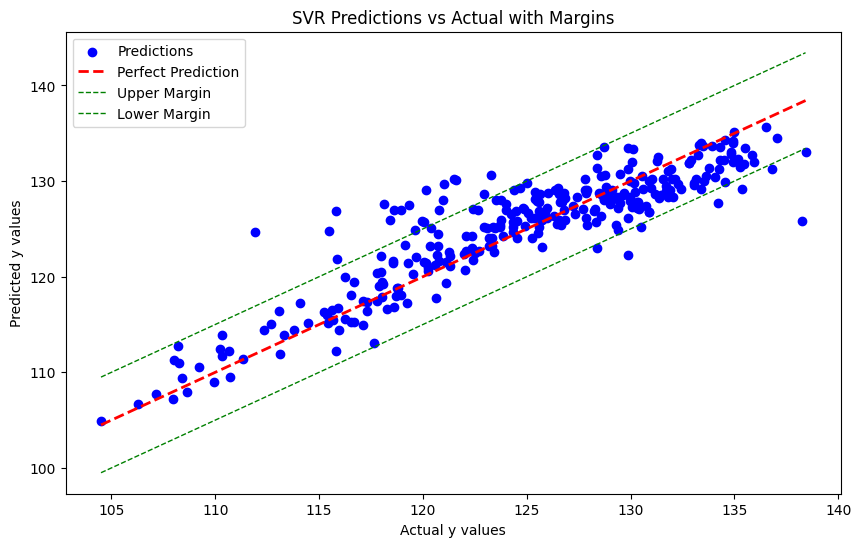

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))


plt.scatter(y_test_original, y_pred_original, color='blue', label='Predictions')


plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2, label='Perfect Prediction')


epsilon = 5
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min() + epsilon, y_test_original.max() + epsilon],
         'g--', lw=1, label='Upper Margin')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min() - epsilon, y_test_original.max() - epsilon],
         'g--', lw=1, label='Lower Margin')


plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('SVR Predictions vs Actual with Margins')
plt.legend()
plt.show()


In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_original, y_pred_original)

print("Mean Squared Error: ",mse)

Mean Squared Error:  10.064471290730891
